In [2]:

import datetime
import numpy as np
import pandas as pd
import pandas
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import pearsonr
from matplotlib.ticker import MaxNLocator
from ast import literal_eval

from utils import sliding_average, savefig, question_title_map, load_data, human_index

In [3]:
Path('visualization').mkdir(exist_ok=True)
today = f'{datetime.datetime.today():%Y_%m_%d}'
simplify = True

In [4]:
bot_detection_title_map = {
    "All": "All",
    "Yes": "Bot detected",
    "No": "Bot not detected"
}

In [ ]:
condition_2_data = pandas.read_csv("data/condition_2.csv")
condition_3_data = pandas.read_csv("data/condition_3.csv")
data = pd.concat([condition_2_data, condition_3_data])


fig, axes = plt.subplots(figsize=(12, 8), ncols=3, nrows=2, sharey=True)

for row, affection in enumerate(['competence', 'warmth']):
    for col, bot_detection in enumerate(['All', 'Yes', 'No']):
        if bot_detection == 'Yes':
            temp_data = data.loc[(data['bot_detection']) & ((data['who_answers_first'] == 0) | (data['who_answers_first'] == 2))]
        elif bot_detection == 'No':
            temp_data = data.loc[~(data['bot_detection']) & ((data['who_answers_first'] == 0) | (data['who_answers_first'] == 2))]
        else:
            temp_data = data.loc[((data['who_answers_first'] == 0) | (data['who_answers_first'] == 2))]
        ax = axes[row][col]
        x = temp_data['ideology_distance']
        y = temp_data['affection_warmth'] if affection == "warmth" else temp_data['affection_competence']
        corr, p = pearsonr(x, y)
        average, low, high = sliding_average(x, y)
        ax.plot(average.index, average.values, lw=5, alpha=0.7)

        ax.fill_between(average.index, low, high, alpha=0.2)
        ax.set(
            xlabel='Ideological distance', 
            ylabel='Affection of warmth' if affection == "warmth" else "Affection of competence",
            ylim=(-1.1, 1.1),
            title=bot_detection_title_map[bot_detection]
        )
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
        ax.annotate(f"correlation: {corr:.2f}\np value: {p:.2e}", xy=(2.6, 1.5))
savefig(fig, f'visualization/{today}-ideology_emotional.pdf', tight_layout=True)

In [ ]:
condition_2_data = pandas.read_csv("data/condition_2.csv")
condition_3_data = pandas.read_csv("data/condition_3.csv")

bot_detection_title_map = {
    "All": "",
    "Yes": "Bot detected, ",
    "No": "Bot not detected, "
}

bot_detection_str_map = {
    "All": "all",
    "Yes": "bot",
    "No": "no_bot"
}

fig, axes = plt.subplots(figsize=(24, 32), ncols=3, nrows=6, sharey=True)

for row, question in enumerate([0, 1, 2, 3, 4, 5]):
    for col, bot_detection in enumerate(['All', 'Yes', 'No']):
        ax = axes[row][col]
        data = pd.concat([condition_2_data, condition_3_data])
        if bot_detection == 'Yes':
            data = data.loc[data['bot_detection']]
        elif bot_detection == 'No':
            data = data.loc[~data['bot_detection']]
        if question != 'all':
            data = data.loc[data['idx_of_question'] == question]

        indexes = [-1, 0, 1]
        means = []
        stds = []
    
        for index in indexes:
            index_data = data.loc[data['affection_warmth'] == index]
            means.append(index_data['answer_distance'].mean())
            stds.append(index_data['answer_distance'].std())
        ax.errorbar(indexes, means, yerr=stds, fmt="o-", capsize=10)
        from matplotlib.ticker import MaxNLocator
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        ax.set(
            xlabel="Affection of warmth",
            ylabel="Opinion distance",
            ylim=(-0.1, 6.1)
        )
        ax.set_title(f"{bot_detection_title_map[bot_detection]}{question_title_map[question]}", fontsize=15)
        corr, p = pearsonr(indexes, means)
        ax.annotate(f"correlation: {corr:.2f}\np value: {p:.2e}", xy=(0.6, 5))

savefig(fig, f'visualization/{today}-warmth_opinion-each_question.pdf')

In [ ]:
condition_2_data = pandas.read_csv("data/condition_2.csv")
condition_3_data = pandas.read_csv("data/condition_3.csv")

bot_detection_title_map = {
    "All": "",
    "Yes": "Bot detected, ",
    "No": "Bot not detected, "
}

bot_detection_str_map = {
    "All": "all",
    "Yes": "bot",
    "No": "no_bot"
}

fig, axes = plt.subplots(figsize=(24, 32), ncols=3, nrows=6, sharey=True)

for row, question in enumerate([0, 1, 2, 3, 4, 5]):
    for col, bot_detection in enumerate(['All', 'Yes', 'No']):
        ax = axes[row][col]
        data = pd.concat([condition_2_data, condition_3_data])
        if bot_detection == 'Yes':
            data = data.loc[data['bot_detection']]
        elif bot_detection == 'No':
            data = data.loc[~data['bot_detection']]
        if question != 'all':
            data = data.loc[data['idx_of_question'] == question]

        indexes = [-1, 0, 1]
        means = []
        stds = []
    
        for index in indexes:
            index_data = data.loc[data['affection_competence'] == index]
            means.append(index_data['answer_distance'].mean())
            stds.append(index_data['answer_distance'].std())
        ax.errorbar(indexes, means, yerr=stds, fmt="o-", capsize=10)
        from matplotlib.ticker import MaxNLocator
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        ax.set(
            xlabel="Affection of competence",
            ylabel="Opinion distance",
            ylim=(-0.1, 6.1)
        )
        ax.set_title(f"{bot_detection_title_map[bot_detection]}{question_title_map[question]}", fontsize=15)
        corr, p = pearsonr(indexes, means)
        ax.annotate(f"correlation: {corr:.2f}\np value: {p:.2e}", xy=(0.6, 5))

savefig(fig, f'visualization/{today}-competence_opinion-each_question.pdf')

In [ ]:
fig, axes = plt.subplots(figsize=(8, 12), ncols=1, nrows=3)

question = "all"
for col, bot_detection in enumerate(['All', 'Yes', 'No']):
    ax = axes[col]
    data = pd.concat([condition_2_data, condition_3_data])
    if bot_detection == 'Yes':
        data = data.loc[data['bot_detection']]
    elif bot_detection == 'No':
        data = data.loc[~data['bot_detection']]
    if question != 'all':
        data = data.loc[data['idx_of_question'] == question]

    indexes = [-1, 0, 1]
    means = []
    stds = []

    for index in indexes:
        index_data = data.loc[data['affection_competence'] == index]
        means.append(index_data['answer_distance'].mean())
        stds.append(index_data['answer_distance'].std())
    ax.errorbar(indexes, means, yerr=stds, fmt="o-", capsize=10)

    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set(
        xlabel="Affection of competence", 
        ylabel="Opinion distance",
        ylim=(-0.1, 6.1)
    )
    ax.set_title(f"{bot_detection_title_map[bot_detection]}{question_title_map[question]}")
    corr, p = pearsonr(indexes, means)
    ax.annotate(f"correlation: {corr:.2f}\np value: {p:.2e}", xy=(1.1, 5))

savefig(fig, f'visualization/{today}-competence_opinion.pdf')

In [ ]:
fig, axes = plt.subplots(figsize=(18, 10), ncols=3, nrows=2)

question = "all"
for row, affection in enumerate(["warmth", "competence"]):
    for col, bot_detection in enumerate(['All', 'Yes', 'No']):
        ax = axes[row][col]
        data = pd.concat([condition_2_data, condition_3_data])
        if bot_detection == 'Yes':
            data = data.loc[data['bot_detection']]
        elif bot_detection == 'No':
            data = data.loc[~data['bot_detection']]
        if question != 'all':
            data = data.loc[data['idx_of_question'] == question]

        indexes = [-1, 0, 1]
        means = []
        stds = []

        for index in indexes:
            index_data = data.loc[data[f"affection_{affection}"] == index]
            means.append(index_data['answer_distance'].mean())
            stds.append(index_data['answer_distance'].std())
        ax.errorbar(indexes, means, yerr=stds, fmt="o-", capsize=10)

        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        ax.set(
            xlabel=f"Affection of {affection}", 
            ylabel="Opinion distance",
            ylim=(-0.1, 4.1)
        )
        ax.set_title(f"{bot_detection_title_map[bot_detection]}{question_title_map[question]}")
        corr, p = pearsonr(indexes, means)
        ax.annotate(f"correlation: {corr:.2f}\np value: {p:.2e}", xy=(0.5, 3.2))

    savefig(fig, f'visualization/{today}-emotion_opinion.pdf')

/Users/guodawei/Library/Mobile Documents/com~apple~CloudDocs/Documents/大学/科研/问卷网站/Online-Politicization-Experiment-Website/data_analysis/utils.py:25: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
/Users/guodawei/Library/Mobile Documents/com~apple~CloudDocs/Documents/大学/科研/问卷网站/Online-Politicization-Experiment-Website/data_analysis/utils.py:25: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


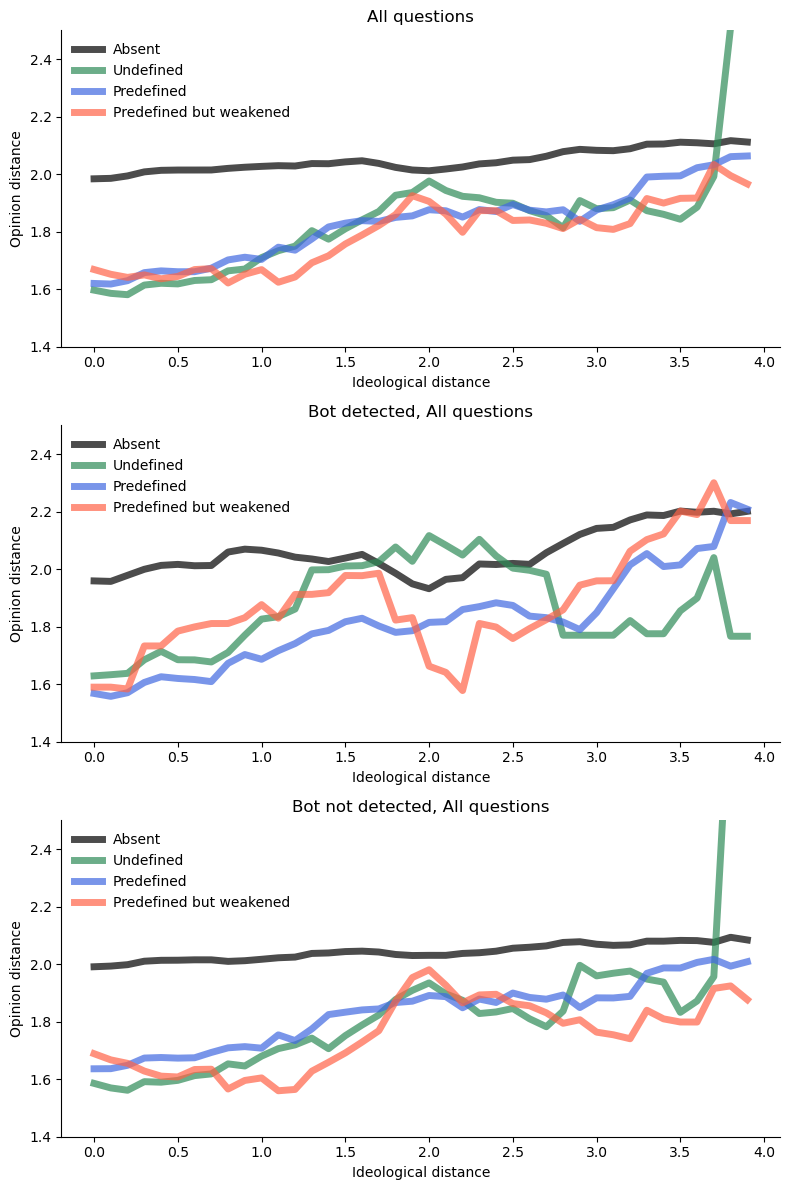

In [7]:
bot_detection_str_map = {
    "All": "all",
    "Yes": "bot",
    "No": "no_bot"
}
        
bot_detection_title_map = {
    "All": "",
    "Yes": "Bot detected, ",
    "No": "Bot not detected, "
}

fig, axes = plt.subplots(figsize=(8, 12), ncols=1, nrows=3)

question = "all"

for col, bot_detection in enumerate(['All', 'Yes', 'No']):
    ax = axes[col]
    for i, anchor in enumerate(['Absent', 'Undefined', 'Predefined', 'Predefined but weakened']):
        
        data = None
        if anchor == 'Absent':
            data = load_data([2, 3])
            data['ideology_distance'] = data['ideology_distance'].apply(literal_eval)
            data = data.explode('ideology_distance')

        elif anchor == 'Undefined':
            data = load_data(1)
        elif anchor == 'Predefined':
            data = load_data(2)
        else:
            data = load_data(3)

        # filter by bot detection
        if 'bot_detection' in data.columns:
            if bot_detection == 'Yes':
                data = data.loc[data['bot_detection']]
            elif bot_detection == 'No':
                data = data.loc[~data['bot_detection']]

        if question != 'all':
            data = data.loc[question == data['idx_of_question']]
            
        # absent or present
        if anchor == 'Absent':
            data = data.loc[data['who_answers_first'].isin([1])]    # human answers first
        else:
            data = data.loc[data['who_answers_first'].isin([0, 2])] # bot answers first

        # make sure the data type is float
        for col in ['ideology_distance', 'answer_distance']:
            data[col] = data[col].astype(float)
        
        color_map = {
            'Absent': 'black',
            'Undefined': 'seagreen',
            'Predefined': 'royalblue',
            'Predefined but weakened': 'tomato',
        }

        # if anchor in ['Absent', 'Undefined']:
        #     average = data['answer_distance'].mean() # float
        #     std = data['answer_distance'].std()
        #     if not simplify:
        #         ax.boxplot(data['answer_distance'], 
        #                     positions={'Absent': [-2], 'Undefined': [-1]}[anchor],
        #                     showmeans=True, showfliers=False, medianprops={'linewidth': 0}, meanprops=dict(marker='o', markerfacecolor=color_map[anchor], markeredgecolor=color_map[anchor])),

        #         position = {'Absent': [-2], 'Undefined': [-1]}[anchor]
        #         ax.plot([position[0], 4], [average, average], linestyle='--', color=color_map[anchor], alpha=0.7)
        #     else:
        #         if anchor == 'Absent':
        #             average, low, high = sliding_average(x=data['ideology_distance'], y=data['answer_distance'])
        #             ax.plot(average.index, average.values, lw=5, label=anchor, alpha=0.7, color=color_map[anchor])
        #         else:
        #             ax.plot([0, 4], [average, average], linestyle='--', color=color_map[anchor], alpha=0.7, label=anchor)
        # elif anchor in ['Predefined', 'Predefined but weakened']:
            
        average, low, high = sliding_average(x=data['ideology_distance'], y=data['answer_distance'])  # pandas.Series
        ax.plot(average.index, average.values, lw=5, label=anchor, alpha=0.7, color=color_map[anchor])
        if not simplify:
            ax.fill_between(average.index, low, high, color=color_map[anchor], alpha=0.1)
        if anchor in ['Predefined']:
            corr, p = pearsonr(data['ideology_distance'], data['answer_distance'])
            
    # wrap up
    ax.legend(loc=0, frameon=False)
    ax.set_title(f"{bot_detection_title_map[bot_detection]}{question_title_map[question]}")
    if not simplify:
        ax.annotate(f"correlation: {corr:.2f}\np value: {p:.2e}", xy=(2.55, 3.85)),
    ylim=(-0.1, 6.1)
    
    if not simplify:
        ax.set(
            xlabel='                                 Ideological distance between anchoring bot and human', 
            ylabel='Opinion distance',
            xticks=[-2, -1] + list(range(int(ax.get_xlim()[1] + 1))),
            xticklabels=['No\nanchor', 'Undefined\nanchor'] + list(range(int(ax.get_xlim()[1] + 1)))
        )
    else:
        ax.set(
            xlabel="Ideological distance",
            ylabel="Opinion distance",
            ylim=(1.4, 2.5)
        )

    savefig(fig, f'visualization/{today}-merged.pdf')
    # if not simplify:
    #     savefig(fig, f'visualization/{today}-merged.pdf')
    # else:
    #     savefig(fig, f'visualization/{today}-merged-simplified.pdf')

/Users/guodawei/Library/Mobile Documents/com~apple~CloudDocs/Documents/大学/科研/问卷网站/Online-Politicization-Experiment-Website/data_analysis/utils.py:25: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
/Users/guodawei/Library/Mobile Documents/com~apple~CloudDocs/Documents/大学/科研/问卷网站/Online-Politicization-Experiment-Website/data_analysis/utils.py:25: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
/Users/guodawei/Library/Mobile Documents/com~apple~CloudDocs/Documents/大学/科研/问卷网站/Online-Politicization-Experiment-Website/data_analysis/utils.py:25: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
/Users/guodawei/Library/Mobile Documents/com~apple~CloudDocs/Documents/大学/科研/问卷网站/Online-Politicization-Experiment-Website/data_analysis/utils.py:25: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
/Users/guodawei/Library/Mobile Documents/com~apple~CloudDocs/Documents/大学/科研/问卷网站/Online-Politicization-Expe

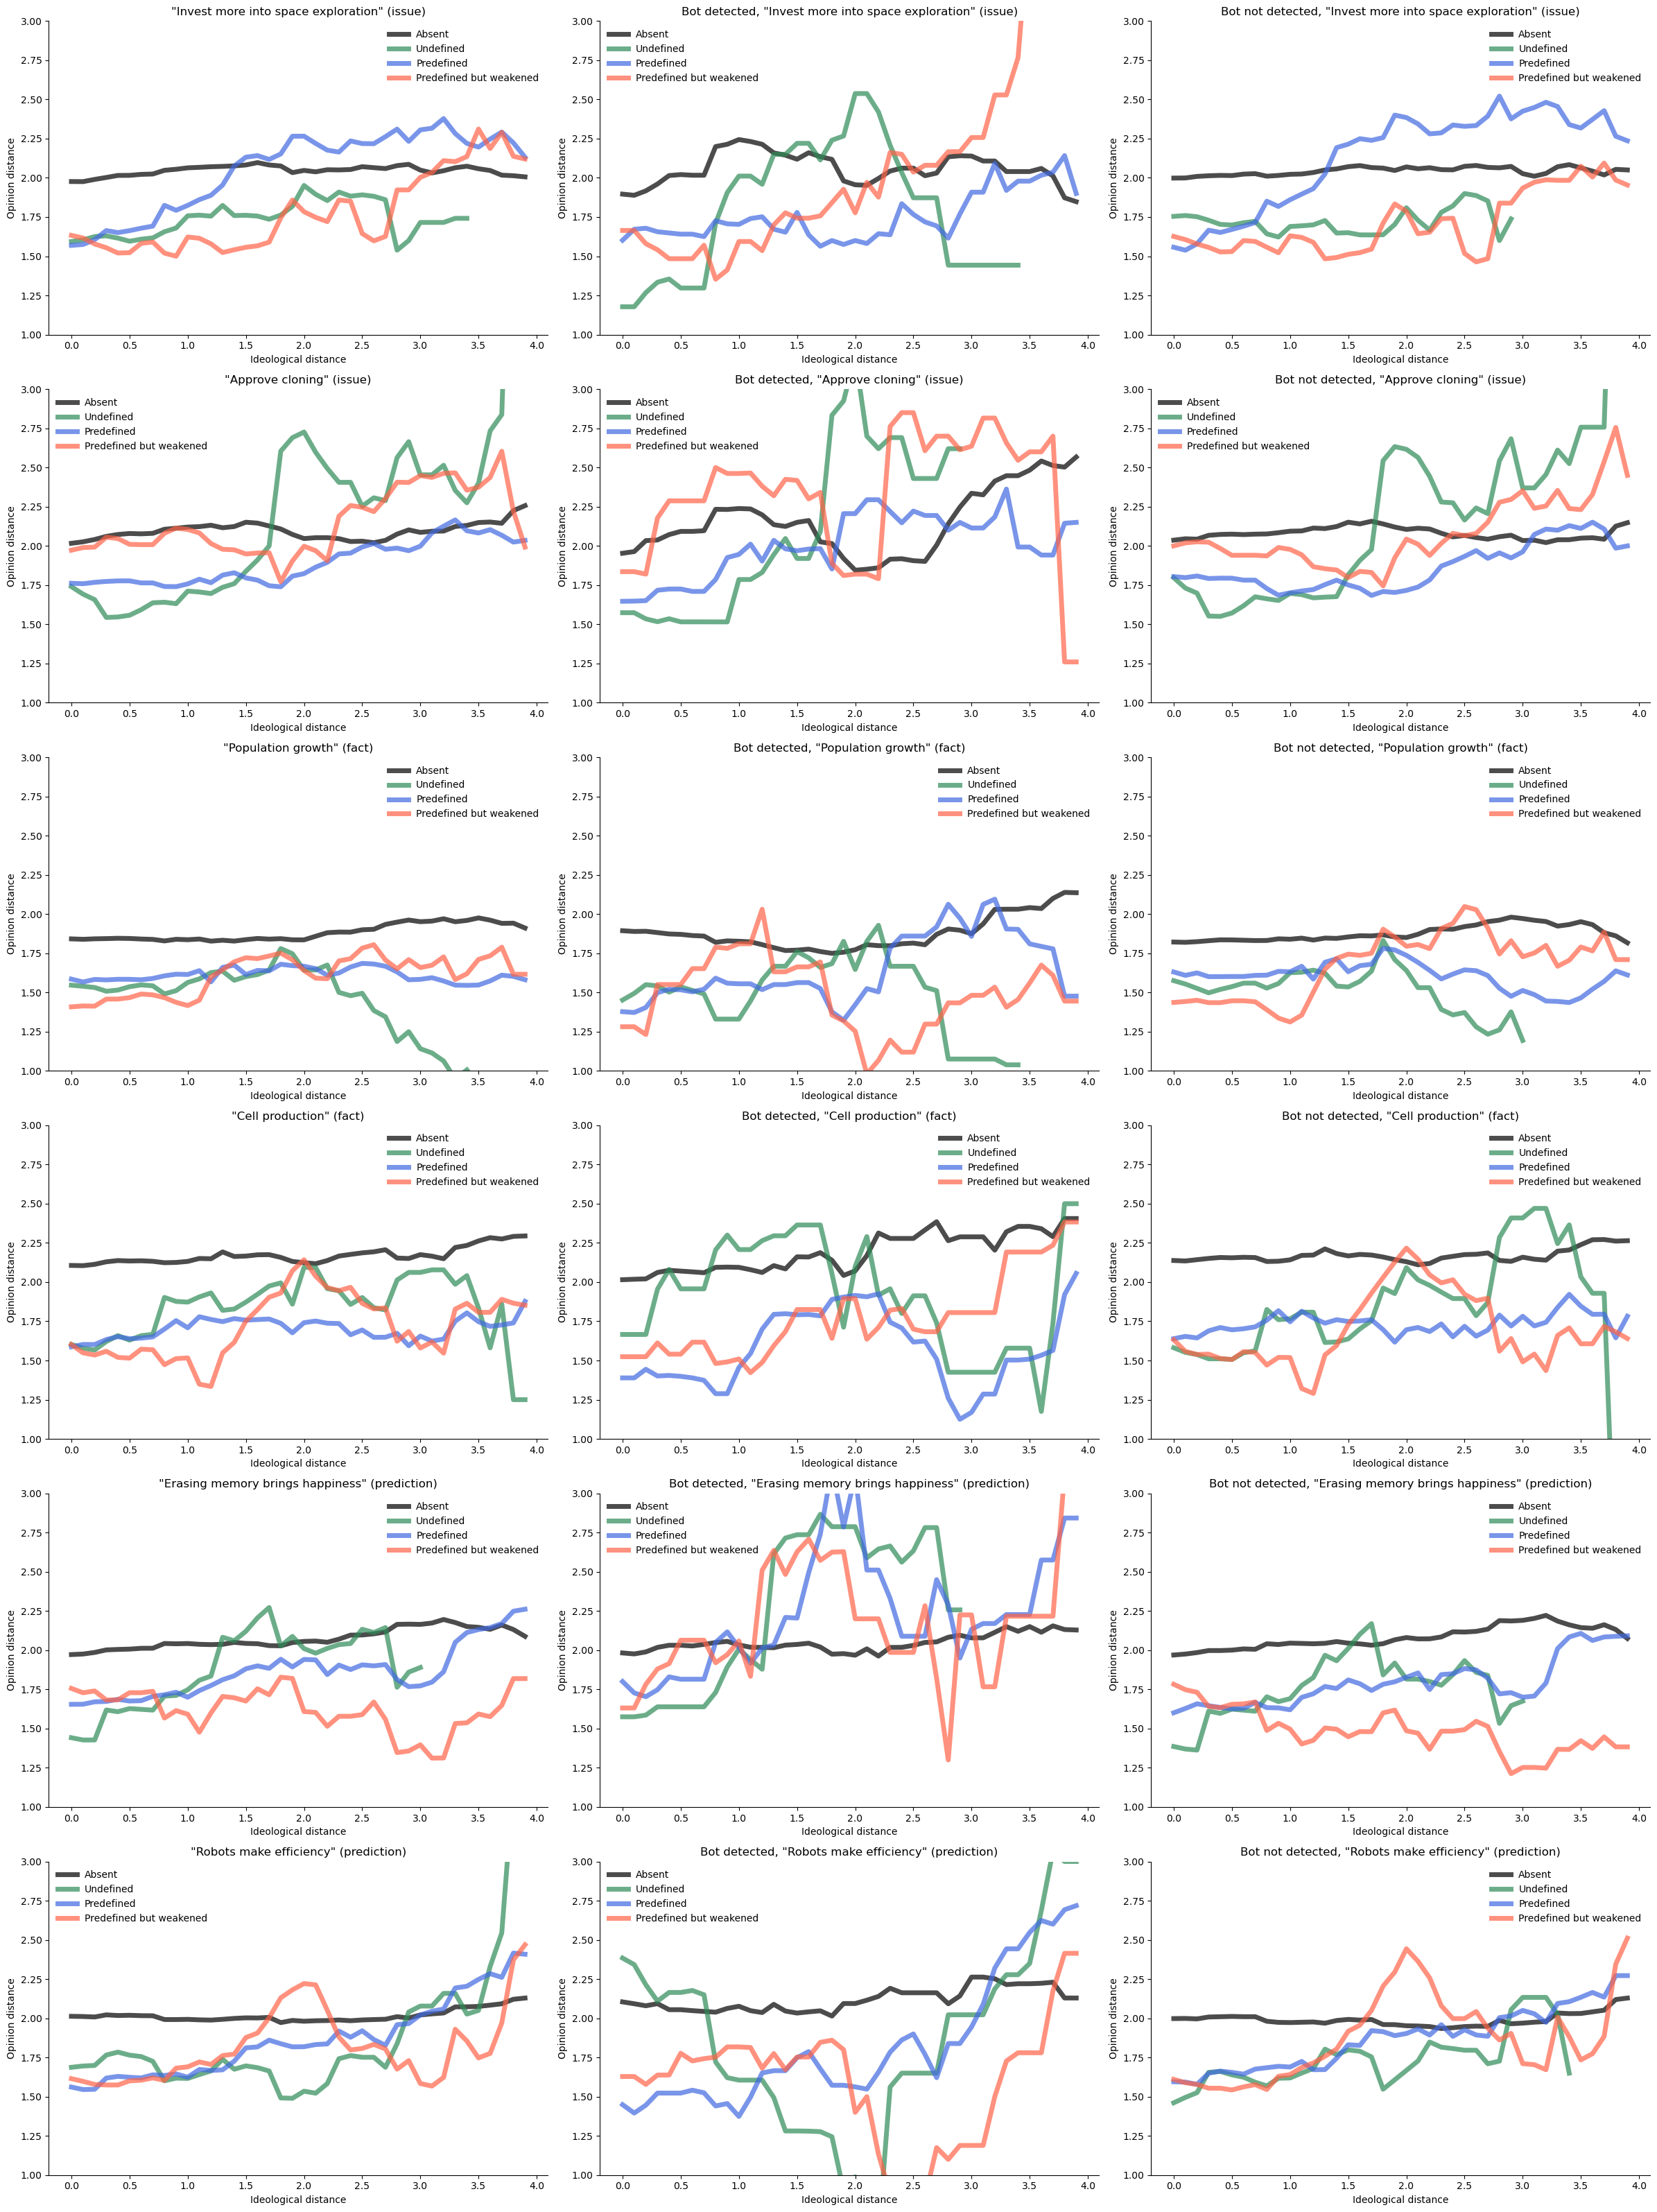

In [8]:
unfold = True

fig, axes = plt.subplots(figsize=(24, 32), ncols=3, nrows=6)

for question in [0, 1, 2, 3, 4, 5]:
    for col, bot_detection in enumerate(['All', 'Yes', 'No']):

        ax = axes[question][col]
        for i, anchor in enumerate(['Absent', 'Undefined', 'Predefined', 'Predefined but weakened']):  # , 'Predefined but weakened'
            
            data = None
            if anchor == 'Absent':
                data = load_data([2, 3])
                data['ideology_distance'] = data['ideology_distance'].apply(literal_eval)
                data = data.explode('ideology_distance')

            elif anchor == 'Undefined':
                data = load_data(1)
            elif anchor == 'Predefined':
                data = load_data(2)
            else:
                data = load_data(3)

            # filter by bot detection
            if 'bot_detection' in data.columns:
                if bot_detection == 'Yes':
                    data = data.loc[data['bot_detection']]
                elif bot_detection == 'No':
                    data = data.loc[~data['bot_detection']]

            if question != 'all':
                data = data.loc[question == data['idx_of_question']]
                
            # absent or present
            if anchor == 'Absent':
                data = data.loc[data['who_answers_first'].isin([1])]    # human answers first
            else:
                data = data.loc[data['who_answers_first'].isin([0, 2])] # bot answers first

            color_map = {
                'Absent': 'black',
                'Undefined': 'seagreen',
                'Predefined': 'royalblue',
                'Predefined but weakened': 'tomato',
            }
            
            # make sure the data type is float
            for col in ['ideology_distance', 'answer_distance']:
                data[col] = data[col].astype(float)
        

            # bar or plot
            # if anchor in ['Absent', 'Undefined']:
            #     average = data['answer_distance'].mean() # float
            #     std = data['answer_distance'].std()
            #     if not simplify:
            #         ax.boxplot(data['answer_distance'], 
            #                     positions={'Absent': [-2], 'Undefined': [-1]}[anchor],
            #                     showmeans=True, showfliers=False, medianprops={'linewidth': 0}, meanprops=dict(marker='o', markerfacecolor=color_map[anchor], markeredgecolor=color_map[anchor])),

            #         position = {'Absent': [-2], 'Undefined': [-1]}[anchor]
            #         ax.plot([position[0], 4], [average, average], linestyle='--', color=color_map[anchor], alpha=0.7)
            #     else:
            #         if anchor == 'Absent':
            #             average, low, high = sliding_average(x=data['ideology_distance'], y=data['answer_distance'])
            #             ax.plot(average.index, average.values, lw=5, label=anchor, alpha=0.7, color=color_map[anchor])
            #         else:
            #             ax.plot([0, 4], [average, average], linestyle='--', color=color_map[anchor], alpha=0.7, label=anchor)
            # elif anchor in ['Predefined', 'Predefined but weakened']:
            
            average, low, high = sliding_average(x=data['ideology_distance'], y=data['answer_distance'])  # pandas.Series
            ax.plot(average.index, average.values, lw=5, label=anchor, alpha=0.7, color=color_map[anchor])
            if not simplify:
                ax.fill_between(average.index, low, high, color=color_map[anchor], alpha=0.1)
            if anchor in ['Predefined']:
                corr, p = pearsonr(data['ideology_distance'], data['answer_distance'])
                
        # wrap up
        ax.legend(loc=0, frameon=False)
        ax.set_title(f"{bot_detection_title_map[bot_detection]}{question_title_map[question]}")
        if not simplify:
            ax.annotate(f"correlation: {corr:.2f}\np value: {p:.2e}", xy=(2.55, 3.85)),
        ylim=(-0.1, 6.1)
        
        if not simplify:
            ax.set(
                xlabel='                                 Ideological distance between anchoring bot and human', 
                ylabel='Opinion distance',
                xticks=[-2, -1] + list(range(int(ax.get_xlim()[1] + 1))),
                xticklabels=['No\nanchor', 'Undefined\nanchor'] + list(range(int(ax.get_xlim()[1] + 1)))
            )
        else:
            ax.set(
                xlabel="Ideological distance",
                ylabel="Opinion distance",
                ylim=(1, 3)
            )
        savefig(fig, f'visualization/{today}-merged-each_question.pdf')
        # if not simplify:
        #     savefig(fig, f'visualization/{today}-merged-each_question.pdf')
        # else:
        #     savefig(fig, f'visualization/{today}-merged-each_question-simplified.pdf')

In [ ]:
fig, axes = plt.subplots(figsize=(24, 32), ncols=3, nrows=6)

data_file = 'data/condition_' + str({'Absent': 2, 'Undefined': 1, 'Predefined': 2, 'Predefined but weakened': 3}[anchor]) + '.csv'
data = pandas.read_csv(data_file, index_col=0)
data = data.loc[~data['ideology_all_zeros']]
data['ideology_group'] = pd.qcut(data['ideology'], q=3, labels=list(range(3)))

for question in [0, 1, 2, 3, 4, 5]:
    for col, group in enumerate(range(3)):

        ax = axes[question][col]
        for i, anchor in enumerate(['Absent', 'Undefined', 'Predefined', 'Predefined but weakened']):  # , 'Predefined but weakened'

            # load data


            data = data.loc[data['ideology_group'] == col]
            # only use those who did not recognize bots
            # data = data.loc[~data['bot_detection']]

            # only use validity_level==3 examples
            # if 'validity_level' in data.columns:
            #     data = data.loc[3 == data['validity_level']]

            # filter by scm labels?
            # if filter_scm and ('has_SCM_label' in data.columns):
            #     data = data.loc[data['has_SCM_label']]

            # filter by bot detection
            # if 'bot_detection' in data.columns:
            #     if bot_detection == 'Yes':
            #         data = data.loc[data['bot_detection']]
            #     elif bot_detection == 'No':
            #         data = data.loc[~data['bot_detection']]

            if question != 'all':
                data = data.loc[question == data['idx_of_question']]
                
            # absent or present
            if anchor == 'Absent':
                data = data.loc[data['who_answers_first'].isin([1])]    # human answers first
            else:
                data = data.loc[data['who_answers_first'].isin([0, 2])] # bot answers first

            color_map = {
                'Absent': 'black',
                'Undefined': 'seagreen',
                'Predefined': 'royalblue',
                'Predefined but weakened': 'tomato',
            }

            # bar or plot
            if anchor in ['Absent', 'Undefined']:
                average = data['answer_distance'].mean() # float
                std = data['answer_distance'].std()
                if not simplify:
                    ax.boxplot(data['answer_distance'], 
                                positions={'Absent': [-2], 'Undefined': [-1]}[anchor],
                                showmeans=True, showfliers=False, medianprops={'linewidth': 0}, meanprops=dict(marker='o', markerfacecolor=color_map[anchor], markeredgecolor=color_map[anchor])),

                    position = {'Absent': [-2], 'Undefined': [-1]}[anchor]
                    ax.plot([position[0], 4], [average, average], linestyle='--', color=color_map[anchor], alpha=0.7)
                else:
                    ax.plot([0, 4], [average, average], linestyle='--', color=color_map[anchor], alpha=0.7, label=anchor)
            elif anchor in ['Predefined', 'Predefined but weakened']:
                average, low, high = sliding_average(x=data['ideology_distance'], y=data['answer_distance'])  # pandas.Series
                ax.plot(average.index, average.values, lw=5, label=anchor, alpha=0.7, color=color_map[anchor])
                if not simplify:
                    ax.fill_between(average.index, low, high, color=color_map[anchor], alpha=0.1)
                if anchor in ['Predefined']:
                    corr, p = pearsonr(data['ideology_distance'], data['answer_distance'])
                
        # wrap up
        ax.legend(loc=0, frameon=False)
        if group == 0:
            ax.set_title(f"Liberal, {question_title_map[question]}")
        elif group == 1:
            ax.set_title(f"Medium, {question_title_map[question]}")
        elif group == 2:
            ax.set_title(f"Conservative, {question_title_map[question]}")
        if not simplify:
            ax.annotate(f"correlation: {corr:.2f}\np value: {p:.2e}", xy=(2.55, 3.85)),
        ylim=(-0.1, 6.1)
        
        if not simplify:
            ax.set(
                xlabel='                                 Ideological distance between anchoring bot and human', 
                ylabel='Opinion distance',
                xticks=[-2, -1] + list(range(int(ax.get_xlim()[1] + 1))),
                xticklabels=['No\nanchor', 'Undefined\nanchor'] + list(range(int(ax.get_xlim()[1] + 1)))
            )
        else:
            ax.set(
                xlabel="Ideological distance",
                ylabel="Opinion distance",
                ylim=(0, 4)
            )

        if not simplify:
            savefig(fig, f'visualization/{today}-merged-each_question.pdf')
        else:
            savefig(fig, f'visualization/{today}-merged-each_question-simplified.pdf')

In [ ]:
# a = pd.read_csv("data/condition_1.csv")
b = pd.read_csv("data/condition_2.csv")
c = pd.read_csv("data/condition_3.csv")
data = pd.concat([b, c])
data = data.loc[(data['idx_of_question'] == 5) & (data['who_answers_first'] == 1)]
data.head()
len(data)

In [ ]:
average, low, high = sliding_average(x=data['ideology'], y=np.abs(data['answer']))  # pandas.Series
# plt.plot(average.index, average.values, lw=5, label=anchor, alpha=0.7, color=color_map[anchor])
plt.scatter(data['answer'], np.abs(data['ideology']))

In [ ]:
data = data.loc[data['who_answers_first'] == 1]
# data = data.loc[~data['ideology_all_zeros']]
average, low, high = sliding_average(x=data['ideology_distance'], y=data['answer_distance'])  # pandas.Series
plt.plot(average.index, average.values, lw=5, label=anchor, alpha=0.7, color=color_map[anchor])
# plt.set_ylim(-3, 3)

In [ ]:
n = 5
data['ideology_group'] = pd.qcut(data['ideology'], q=n, labels=list(range(n)))

for group in range(n):
    data_selected = data.loc[data['ideology_group'] == group]
    plt.bar(data_selected['ideology'], data_selected['answer'])
    break

In [19]:
from ast import literal_eval
a = pd.read_csv("data/condition_3.csv")
a = a.loc[a['who_answers_first'] != human_index]
a['ideology_distance'] = a['ideology_distance'].astype(float)
a['answer_distance'] = a['answer_distance'].astype(float)

pearsonr(a['ideology_distance'], a['answer_distance'])

PearsonRResult(statistic=0.07291581920756372, pvalue=0.013306692909924488)